# ufc_fight_stats and ufc_fight_results

In [1]:
!pip install catboost -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [5]:
sns.set_palette('Set2')

## Merge Datasets

### ufc_fight_stats.csv

In [9]:
df_stats = pd.read_csv('C:/Users/Ben/Documents/ufc-fight-prediction/data/ufc_fight_stats.csv')

In [10]:
df_stats.head(15)

,EVENT,BOUT,ROUND,FIGHTER,KD,SIG.STR.,SIG.STR. %,TOTAL STR.,TD,TD %,SUB.ATT,REV.,CTRL,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND
0,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Round 1,Arman Tsarukyan,0.0,19 of 30,63%,32 of 45,1 of 3,33%,0.0,0.0,3:16,12 of 22,2 of 3,5 of 5,15 of 26,2 of 2,2 of 2
1,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Round 2,Arman Tsarukyan,0.0,23 of 30,76%,37 of 44,1 of 1,100%,1.0,0.0,2:46,21 of 27,1 of 2,1 of 1,3 of 5,0 of 0,20 of 25
2,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Round 1,Dan Hooker,0.0,5 of 20,25%,9 of 25,0 of 0,---,1.0,0.0,0:10,2 of 13,2 of 6,1 of 1,4 of 17,1 of 3,0 of 0
3,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Round 2,Dan Hooker,0.0,5 of 13,38%,8 of 16,0 of 0,---,1.0,0.0,0:00,1 of 7,4 of 6,0 of 0,5 of 13,0 of 0,0 of 0
4,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 1,Belal Muhammad,0.0,24 of 57,42%,30 of 69,0 of 1,0%,0.0,0.0,0:40,17 of 49,5 of 5,2 of 3,23 of 55,1 of 2,0 of 0
5,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 2,Belal Muhammad,0.0,11 of 33,33%,28 of 58,0 of 3,0%,0.0,0.0,1:49,9 of 30,2 of 3,0 of 0,10 of 30,1 of 3,0 of 0
6,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 3,Belal Muhammad,0.0,21 of 49,42%,39 of 70,0 of 3,0%,0.0,0.0,1:06,19 of 47,1 of 1,1 of 1,19 of 46,2 of 3,0 of 0
7,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 1,Ian Machado Garry,0.0,27 of 53,50%,31 of 57,0 of 0,---,0.0,0.0,0:00,14 of 36,2 of 5,11 of 12,27 of 53,0 of 0,0 of 0
8,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 2,Ian Machado Garry,0.0,20 of 39,51%,35 of 56,0 of 1,0%,0.0,0.0,0:06,9 of 27,3 of 4,8 of 8,19 of 38,1 of 1,0 of 0
9,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Round 3,Ian Machado Garry,0.0,25 of 49,51%,30 of 54,0 of 1,0%,0.0,0.0,0:33,12 of 35,5 of 6,8 of 8,20 of 43,5 of 6,0 of 0


In [11]:
df_stats.shape

(39852, 19)

In [12]:
print(list(df_stats.columns.sort_values()))

['BODY', 'BOUT', 'CLINCH', 'CTRL', 'DISTANCE', 'EVENT', 'FIGHTER', 'GROUND', 'HEAD', 'KD', 'LEG', 'REV.', 'ROUND', 'SIG.STR.', 'SIG.STR. %', 'SUB.ATT', 'TD', 'TD %', 'TOTAL STR.']


In [13]:
df_stats.isna().sum()

EVENT          0
BOUT           0
ROUND         42
FIGHTER       42
KD            42
SIG.STR.      42
SIG.STR. %    42
TOTAL STR.    42
TD            42
TD %          42
SUB.ATT       42
REV.          42
CTRL          42
HEAD          42
BODY          42
LEG           42
DISTANCE      42
CLINCH        42
GROUND        42
dtype: int64

In [14]:
df_stats.dropna(inplace=True)

In [15]:
def mins_to_secs(x):
    time = x.split(':')
    if len(time) == 2:
        return int(time[0])*60 + int(time[1])
    else:
        return 0

In [16]:
df_stats.loc[df_stats['CTRL']=='--', :].shape

(432, 19)

In [17]:
df_stats['CTRL'] = df_stats['CTRL'].replace({'--': '0:00'})

In [18]:
df_stats['fighter_ctrl'] = df_stats['CTRL'].map(lambda x: mins_to_secs(x))

In [19]:
def get_strikes(x):
    return x.split(' of ')[0]

In [20]:
df_stats['fighter_td_att'] = df_stats['TD'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str'] = df_stats['SIG.STR.'].map(lambda x: get_strikes(x))
df_stats['fighter_total_str'] = df_stats['TOTAL STR.'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_head'] = df_stats['HEAD'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_body'] = df_stats['BODY'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_leg'] = df_stats['LEG'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_distance'] = df_stats['DISTANCE'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_clinch'] = df_stats['CLINCH'].map(lambda x: get_strikes(x))
df_stats['fighter_sig_str_ground'] = df_stats['GROUND'].map(lambda x: get_strikes(x))

In [21]:
def convert_pct(x):
    if x == '---':
        return 0.00
    return int(x.split('%')[0]) / 100

In [22]:
df_stats['fighter_td_att_pct'] = df_stats['TD %'].map(lambda x: convert_pct(x))
df_stats['fighter_sig_str_pct'] = df_stats['SIG.STR. %'].map(lambda x: convert_pct(x))
df_stats['fighter_td_pct'] = df_stats['TD %'].map(lambda x: convert_pct(x))

In [23]:
def get_pct(x):
    of = x.split(' of ')
    total = int(of[1])
    if len(of) == 2 and total > 0:
        return int(of[0]) / total
    return 0.00

In [24]:
df_stats['fighter_sig_str_head_pct'] = df_stats['HEAD'].map(lambda x: get_pct(x))
df_stats['fighter_sig_str_body_pct'] = df_stats['BODY'].map(lambda x: get_pct(x))
df_stats['fighter_sig_str_leg_pct'] = df_stats['LEG'].map(lambda x: get_pct(x))
df_stats['fighter_sig_str_distance_pct'] = df_stats['DISTANCE'].map(lambda x: get_pct(x))
df_stats['fighter_sig_str_clinch_pct'] = df_stats['CLINCH'].map(lambda x: get_pct(x))
df_stats['fighter_sig_str_ground_pct'] = df_stats['GROUND'].map(lambda x: get_pct(x))
df_stats['fighter_total_str_pct'] = df_stats['TOTAL STR.'].map(lambda x: get_pct(x))

In [25]:
df_stats.drop(
    columns = [
        'ROUND',
        'SIG.STR.',
        'SIG.STR. %',
        'TOTAL STR.',
        'TD',
        'TD %',
        'CTRL',
        'HEAD',
        'BODY',
        'LEG',
        'DISTANCE',
        'CLINCH',
        'GROUND'
    ],
    inplace = True
)

In [26]:
df_stats.rename(
    columns = {
        'EVENT': 'event_name',
        'BOUT': 'bout',
        'FIGHTER': 'fighter',
        'KD': 'fighter_kd',
        'SUB.ATT': 'fighter_sub_att',
        'REV.': 'fighter_rev'
    },
    inplace = True
)

In [27]:
df_stats.head()

,event_name,bout,fighter,fighter_kd,fighter_sub_att,fighter_rev,fighter_ctrl,fighter_td_att,fighter_sig_str,fighter_total_str,fighter_sig_str_head,fighter_sig_str_body,fighter_sig_str_leg,fighter_sig_str_distance,fighter_sig_str_clinch,fighter_sig_str_ground,fighter_td_att_pct,fighter_sig_str_pct,fighter_td_pct,fighter_sig_str_head_pct,fighter_sig_str_body_pct,fighter_sig_str_leg_pct,fighter_sig_str_distance_pct,fighter_sig_str_clinch_pct,fighter_sig_str_ground_pct,fighter_total_str_pct
0,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Arman Tsarukyan,0.0,0.0,0.0,196,1,19,32,12,2,5,15,2,2,0.33,0.63,0.33,0.545455,0.666667,1.000000,0.576923,1.000000,1.0,0.711111
1,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Arman Tsarukyan,0.0,1.0,0.0,166,1,23,37,21,1,1,3,0,20,1.00,0.76,1.00,0.777778,0.500000,1.000000,0.600000,0.000000,0.8,0.840909
2,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Dan Hooker,0.0,1.0,0.0,10,0,5,9,2,2,1,4,1,0,0.00,0.25,0.00,0.153846,0.333333,1.000000,0.235294,0.333333,0.0,0.360000
3,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,Dan Hooker,0.0,1.0,0.0,0,0,5,8,1,4,0,5,0,0,0.00,0.38,0.00,0.142857,0.666667,0.000000,0.384615,0.000000,0.0,0.500000
4,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,Belal Muhammad,0.0,0.0,0.0,40,0,24,30,17,5,2,23,1,0,0.00,0.42,0.00,0.346939,1.000000,0.666667,0.418182,0.500000,0.0,0.434783


In [28]:
list(df_stats.columns)

['event_name',
 'bout',
 'fighter',
 'fighter_kd',
 'fighter_sub_att',
 'fighter_rev',
 'fighter_ctrl',
 'fighter_td_att',
 'fighter_sig_str',
 'fighter_total_str',
 'fighter_sig_str_head',
 'fighter_sig_str_body',
 'fighter_sig_str_leg',
 'fighter_sig_str_distance',
 'fighter_sig_str_clinch',
 'fighter_sig_str_ground',
 'fighter_td_att_pct',
 'fighter_sig_str_pct',
 'fighter_td_pct',
 'fighter_sig_str_head_pct',
 'fighter_sig_str_body_pct',
 'fighter_sig_str_leg_pct',
 'fighter_sig_str_distance_pct',
 'fighter_sig_str_clinch_pct',
 'fighter_sig_str_ground_pct',
 'fighter_total_str_pct']

In [29]:
df_stats.dtypes

event_name                       object
bout                             object
fighter                          object
fighter_kd                      float64
fighter_sub_att                 float64
fighter_rev                     float64
fighter_ctrl                      int64
fighter_td_att                   object
fighter_sig_str                  object
fighter_total_str                object
fighter_sig_str_head             object
fighter_sig_str_body             object
fighter_sig_str_leg              object
fighter_sig_str_distance         object
fighter_sig_str_clinch           object
fighter_sig_str_ground           object
fighter_td_att_pct              float64
fighter_sig_str_pct             float64
fighter_td_pct                  float64
fighter_sig_str_head_pct        float64
fighter_sig_str_body_pct        float64
fighter_sig_str_leg_pct         float64
fighter_sig_str_distance_pct    float64
fighter_sig_str_clinch_pct      float64
fighter_sig_str_ground_pct      float64


In [30]:
obj_cols = [
    'fighter_td_att',
    'fighter_sig_str',
    'fighter_total_str',
    'fighter_sig_str_head',
    'fighter_sig_str_body',
    'fighter_sig_str_leg',
    'fighter_sig_str_distance',
    'fighter_sig_str_clinch',
    'fighter_sig_str_ground'
]

for col in obj_cols:
    df_stats[col] = df_stats[col].map(lambda x: np.float64(x))

In [31]:
fighter_stats = df_stats.groupby(['event_name', 'bout', 'fighter'], sort=False, as_index=False).agg({
    'fighter_kd': 'sum',
    'fighter_sub_att': 'sum',
    'fighter_rev': 'sum',
    'fighter_ctrl': 'sum',
    'fighter_td_att': 'sum',
    'fighter_sig_str': 'sum',
    'fighter_total_str': 'sum',
    'fighter_sig_str_head': 'sum',
    'fighter_sig_str_body': 'sum',
    'fighter_sig_str_leg': 'sum',
    'fighter_sig_str_distance': 'sum',
    'fighter_sig_str_clinch': 'sum',
    'fighter_sig_str_ground': 'sum',
    'fighter_td_att_pct': 'mean',
    'fighter_sig_str_pct': 'mean',
    'fighter_td_pct': 'mean',
    'fighter_sig_str_head_pct': 'mean',
    'fighter_sig_str_body_pct': 'mean',
    'fighter_sig_str_leg_pct': 'mean',
    'fighter_sig_str_distance_pct': 'mean',
    'fighter_sig_str_clinch_pct': 'mean',
    'fighter_sig_str_ground_pct': 'mean',
    'fighter_total_str_pct': 'mean',
})

fighter_stats['corner'] = (
    fighter_stats.groupby(['event_name', 'bout'], sort=False).cumcount()
    .map({0: 'red', 1: 'blue'})
)

df_pivot = fighter_stats.pivot(
    index=['event_name', 'bout'],
    columns='corner'
)

df_pivot.columns = ['{}_{}'.format(col[1], col[0]) for col in df_pivot.columns]
df_pivot = df_pivot.reset_index()

In [32]:
df_pivot.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646


In [33]:
df_pivot.shape

(8446, 50)

In [34]:
df_pivot['blue_fighter_sig_str'] = df_pivot['blue_fighter_sig_str'].map(lambda x: np.float64(x))

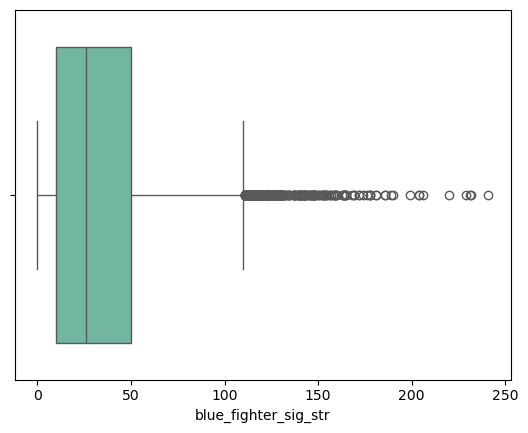

In [35]:
sns.boxplot(data=df_pivot, x='blue_fighter_sig_str');

### ufc_fight_results

In [36]:
df_res = pd.read_csv('C:/Users/Ben/Documents/ufc-fight-prediction/data/ufc_fight_results.csv')

In [37]:
df_res.head()

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL
0,UFC Fight Night: Tsarukyan vs. Hooker,Arman Tsarukyan vs. Dan Hooker,W/L,Lightweight Bout,Submission,2,3:34,5 Rnd (5-5-5-5-5),Marc Goddard,Arm Triangle From Mount,http://ufcstats.com/fight-details/5f5b626e6752...
1,UFC Fight Night: Tsarukyan vs. Hooker,Belal Muhammad vs. Ian Machado Garry,L/W,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Rich Mitchell,Anders Ohlsson 27 - 30.Vito Paolillo 27 - 30.M...,http://ufcstats.com/fight-details/b2218930b982...
2,UFC Fight Night: Tsarukyan vs. Hooker,Volkan Oezdemir vs. Alonzo Menifield,W/L,Light Heavyweight Bout,KO/TKO,1,1:27,3 Rnd (5-5-5),Marc Goddard,Punches to Head At Distance,http://ufcstats.com/fight-details/870d374f8d9a...
3,UFC Fight Night: Tsarukyan vs. Hooker,Jack Hermansson vs. Myktybek Orolbai,L/W,Welterweight Bout,KO/TKO,1,2:46,3 Rnd (5-5-5),Daniel Movahedi,Punch to Head At Distance,http://ufcstats.com/fight-details/8ed609d80e13...
4,UFC Fight Night: Tsarukyan vs. Hooker,Waldo Cortes Acosta vs. Shamil Gaziev,W/L,Heavyweight Bout,KO/TKO,1,1:22,3 Rnd (5-5-5),Lukasz Bosacki,Punch to Head At Distance,http://ufcstats.com/fight-details/e8307c7686c4...


In [38]:
list(df_res.columns.sort_values())

['BOUT',
 'DETAILS',
 'EVENT',
 'METHOD',
 'OUTCOME',
 'REFEREE',
 'ROUND',
 'TIME',
 'TIME FORMAT',
 'URL',
 'WEIGHTCLASS']

In [39]:
df_res.shape

(8468, 11)

In [40]:
df_res.drop_duplicates(subset=['EVENT', 'BOUT'], inplace=True)

In [41]:
df_res.shape

(8467, 11)

In [42]:
df_pivot.shape

(8446, 50)

In [43]:
df_pivot.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646


In [44]:
df = df_pivot.merge(
    df_res[['BOUT', 'OUTCOME', 'METHOD', 'DETAILS', 'ROUND', 'TIME', 'TIME FORMAT']], 
    left_on='bout',
    right_on='BOUT',
    how='left'
)

In [45]:
df['winner'] = df['OUTCOME'].map(lambda x: 'blue' if x.split('/')[0] == 'W' else 'red')

In [46]:
df.rename(
    columns = {
        'METHOD': 'method',
        'DETAILS': 'details',
        'ROUND': 'round',
        'TIME': 'time',
        'TIME FORMAT': 'time_format'
    },
    inplace = True
)

In [47]:
df.drop(columns=['BOUT', 'OUTCOME'], inplace=True)

In [48]:
df['time'] = df['time'].map(lambda x: mins_to_secs(x))

In [49]:
list_winner = list(df['winner'])
result = [1]

prev = 0
for prev, cur in zip(list_winner[:-1], list_winner[1:]):
    if prev == cur:
        result.append(result[-1] + 1)
    else:
        result.append(1)

In [54]:
df.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue


### ufc_event_details.csv

In [60]:
df_event = pd.read_csv('C:/Users/Ben/Documents/ufc-fight-prediction/data/ufc_event_details.csv')

In [61]:
list(df_event.columns)

['EVENT', 'URL', 'DATE', 'LOCATION']

In [62]:
date_format = '%B %d, %Y'
df_event['days_since'] = df_event['DATE'].map(lambda x: (datetime.now() - datetime.strptime(x, date_format)).days)

In [63]:
df = df.merge(
    df_event[['EVENT', 'days_since']], 
    left_on='event_name',
    right_on='EVENT',
    how='left'
)

In [64]:
df.drop(columns='EVENT', inplace=True)

In [65]:
df.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051


In [66]:
for fighter in set(list(df['blue_fighter'].unique()) + list(df['red_fighter'].unique())):
    indexes = df.loc[(df['blue_fighter'] == fighter) | (df['red_fighter'] == fighter)].sort_values(by='days_since').index
    df.loc[indexes, 'wins'] = pd.concat([
        df.loc[df['blue_fighter'] == fighter].replace({'winner': {'blue': 1, 'red': 0}}),
        df.loc[df['red_fighter'] == fighter].replace({'winner': {'red': 1, 'blue': 0}})
    ]).sort_values(by='days_since')['winner'].cumsum()

In [67]:
df.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051,5
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051,5
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051,1


In [68]:
df.sort_values(by='days_since').head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins
7783,UFC Fight Night: Tsarukyan vs. Hooker,Volkan Oezdemir vs. Alonzo Menifield,Alonzo Menifield,Volkan Oezdemir,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2.0,13.0,2.0,14.0,1.0,12.0,1.0,0.0,0.0,1.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.28,0.370000,0.0,0.000000,0.200000,0.363636,0.50,0.000000,0.000000,1.000000,0.285714,0.371429,0.0,0.0,0.000000,0.000000,0.285714,0.378378,KO/TKO,Punches to Head At Distance,1,87,3 Rnd (5-5-5),blue,68,0
7784,UFC Fight Night: Tsarukyan vs. Hooker,Waldo Cortes Acosta vs. Shamil Gaziev,Shamil Gaziev,Waldo Cortes Acosta,0.0,2.0,0.0,0.0,0.0,0.0,0,8,0.0,0.0,6.0,10.0,6.0,15.0,4.0,8.0,1.0,1.0,1.0,1.0,6.0,9.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.40,0.470000,0.0,0.000000,0.307692,0.421053,1.00,1.000000,1.000000,1.000000,0.400000,0.500000,0.0,0.0,0.000000,0.500000,0.400000,0.576923,KO/TKO,Punch to Head At Distance,1,82,3 Rnd (5-5-5),blue,68,1
7782,UFC Fight Night: Tsarukyan vs. Hooker,Tagir Ulanbekov vs. Kyoji Horiguchi,Kyoji Horiguchi,Tagir Ulanbekov,2.0,0.0,1.0,1.0,0.0,0.0,334,85,0.0,1.0,49.0,6.0,120.0,10.0,36.0,3.0,4.0,2.0,9.0,1.0,25.0,6.0,0.0,0.0,24.0,0.0,0.0,0.333333,0.63,0.176667,0.0,0.333333,0.580769,0.062500,1.00,0.380952,0.703704,0.333333,0.685556,0.239130,0.0,0.0,0.518519,0.000000,0.768403,0.304762,Submission,Rear Naked Choke,3,138,3 Rnd (5-5-5),red,68,0
7771,UFC Fight Night: Tsarukyan vs. Hooker,Abdul Rakhman Yakhyaev vs. Rafael Cerqueira,Rafael Cerqueira,Abdul Rakhman Yakhyaev,0.0,1.0,0.0,1.0,0.0,0.0,0,24,0.0,1.0,0.0,6.0,0.0,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,1.000000,0.00,0.600000,0.0,1.000000,0.000000,0.600000,0.00,0.000000,0.000000,0.000000,0.000000,0.750000,0.0,0.0,0.000000,0.500000,0.000000,0.687500,Submission,Rear Naked Choke,1,33,3 Rnd (5-5-5),blue,68,1
7776,UFC Fight Night: Tsarukyan vs. Hooker,Bogdan Grad vs. Luke Riley,Luke Riley,Bogdan Grad,1.0,0.0,0.0,0.0,0.0,0.0,15,235,0.0,4.0,14.0,7.0,20.0,17.0,11.0,6.0,1.0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,9.0,4.0,0.0,0.285000,0.55,0.455000,0.0,0.285000,0.457143,0.333333,0.25,0.500000,0.500000,0.000000,0.366667,0.125000,0.5,0.5,0.409091,0.333333,0.619608,0.525000,KO/TKO,Punches to Head From Guard,2,30,3 Rnd (5-5-5),red,68,0


In [69]:
df['win_streak'] = (
    df.groupby('FIGHTER')['win']
      .apply(lambda s: (s.shift().fillna(0)
                            .groupby(s.eq(0).cumsum())
                            .cumsum()))
)

KeyError: 'FIGHTER'

In [70]:
fighter_wins.head()

NameError: name 'fighter_wins' is not defined

In [71]:
df.sort_values(by='days_since').head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins
7783,UFC Fight Night: Tsarukyan vs. Hooker,Volkan Oezdemir vs. Alonzo Menifield,Alonzo Menifield,Volkan Oezdemir,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2.0,13.0,2.0,14.0,1.0,12.0,1.0,0.0,0.0,1.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.28,0.370000,0.0,0.000000,0.200000,0.363636,0.50,0.000000,0.000000,1.000000,0.285714,0.371429,0.0,0.0,0.000000,0.000000,0.285714,0.378378,KO/TKO,Punches to Head At Distance,1,87,3 Rnd (5-5-5),blue,68,0
7784,UFC Fight Night: Tsarukyan vs. Hooker,Waldo Cortes Acosta vs. Shamil Gaziev,Shamil Gaziev,Waldo Cortes Acosta,0.0,2.0,0.0,0.0,0.0,0.0,0,8,0.0,0.0,6.0,10.0,6.0,15.0,4.0,8.0,1.0,1.0,1.0,1.0,6.0,9.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.40,0.470000,0.0,0.000000,0.307692,0.421053,1.00,1.000000,1.000000,1.000000,0.400000,0.500000,0.0,0.0,0.000000,0.500000,0.400000,0.576923,KO/TKO,Punch to Head At Distance,1,82,3 Rnd (5-5-5),blue,68,1
7782,UFC Fight Night: Tsarukyan vs. Hooker,Tagir Ulanbekov vs. Kyoji Horiguchi,Kyoji Horiguchi,Tagir Ulanbekov,2.0,0.0,1.0,1.0,0.0,0.0,334,85,0.0,1.0,49.0,6.0,120.0,10.0,36.0,3.0,4.0,2.0,9.0,1.0,25.0,6.0,0.0,0.0,24.0,0.0,0.0,0.333333,0.63,0.176667,0.0,0.333333,0.580769,0.062500,1.00,0.380952,0.703704,0.333333,0.685556,0.239130,0.0,0.0,0.518519,0.000000,0.768403,0.304762,Submission,Rear Naked Choke,3,138,3 Rnd (5-5-5),red,68,0
7771,UFC Fight Night: Tsarukyan vs. Hooker,Abdul Rakhman Yakhyaev vs. Rafael Cerqueira,Rafael Cerqueira,Abdul Rakhman Yakhyaev,0.0,1.0,0.0,1.0,0.0,0.0,0,24,0.0,1.0,0.0,6.0,0.0,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,1.000000,0.00,0.600000,0.0,1.000000,0.000000,0.600000,0.00,0.000000,0.000000,0.000000,0.000000,0.750000,0.0,0.0,0.000000,0.500000,0.000000,0.687500,Submission,Rear Naked Choke,1,33,3 Rnd (5-5-5),blue,68,1
7776,UFC Fight Night: Tsarukyan vs. Hooker,Bogdan Grad vs. Luke Riley,Luke Riley,Bogdan Grad,1.0,0.0,0.0,0.0,0.0,0.0,15,235,0.0,4.0,14.0,7.0,20.0,17.0,11.0,6.0,1.0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,9.0,4.0,0.0,0.285000,0.55,0.455000,0.0,0.285000,0.457143,0.333333,0.25,0.500000,0.500000,0.000000,0.366667,0.125000,0.5,0.5,0.409091,0.333333,0.619608,0.525000,KO/TKO,Punches to Head From Guard,2,30,3 Rnd (5-5-5),red,68,0


In [72]:
print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 3, 4, 5, 6, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 3, 4, 5, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 5, 6, 7, 1, 2, 1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 4, 1, 1, 2, 3, 1, 1, 2, 3, 4, 1, 1, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 4, 5, 1, 2, 1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 1, 2, 3, 4, 5, 1, 2, 1, 2, 3, 4, 5, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 1, 1, 2, 1, 2, 3, 4, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

In [73]:
print(list_winner)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'b

In [74]:
df.head()

,event_name,bout,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins
0,Ortiz vs Shamrock 3: The Final Chapter,Jason MacDonald vs. Ed Herman,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11
1,Ortiz vs Shamrock 3: The Final Chapter,Kendall Grove vs. Chris Price,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6
2,Ortiz vs Shamrock 3: The Final Chapter,Marcus Davis vs. Forrest Petz,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051,5
3,Ortiz vs Shamrock 3: The Final Chapter,Matt Hamill vs. Seth Petruzelli,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051,5
4,Ortiz vs Shamrock 3: The Final Chapter,Nate Marquardt vs. Crafton Wallace,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051,1


## Pre-processing

In [75]:
df.isna().sum()

event_name                            0
bout                                  0
blue_fighter                          0
red_fighter                           0
blue_fighter_kd                       0
red_fighter_kd                        0
blue_fighter_sub_att                  0
red_fighter_sub_att                   0
blue_fighter_rev                      0
red_fighter_rev                       0
blue_fighter_ctrl                     0
red_fighter_ctrl                      0
blue_fighter_td_att                   0
red_fighter_td_att                    0
blue_fighter_sig_str                  0
red_fighter_sig_str                   0
blue_fighter_total_str                0
red_fighter_total_str                 0
blue_fighter_sig_str_head             0
red_fighter_sig_str_head              0
blue_fighter_sig_str_body             0
red_fighter_sig_str_body              0
blue_fighter_sig_str_leg              0
red_fighter_sig_str_leg               0
blue_fighter_sig_str_distance         0


In [76]:
df.drop_duplicates(subset='bout', keep=False, inplace=True)

In [77]:
df.dropna(inplace=True)

In [78]:
df.drop(
    columns = [
        'bout'
    ],
    inplace = True
)

In [79]:
df.shape

(8121, 57)

In [80]:
df.head()

,event_name,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins
0,Ortiz vs Shamrock 3: The Final Chapter,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11
1,Ortiz vs Shamrock 3: The Final Chapter,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6
2,Ortiz vs Shamrock 3: The Final Chapter,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.0,1.0,8.0,1.0,5.0,4.0,20.0,0.0,8.0,0.0,0.00,0.270000,0.66,0.0,0.00,0.142857,0.515152,0.666667,0.888889,1.000000,1.000000,0.111111,0.454545,0.444444,0.833333,0.000000,0.533333,0.542857,0.750000,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051,5
3,Ortiz vs Shamrock 3: The Final Chapter,Seth Petruzelli,Matt Hamill,1.0,0.0,1.0,0.0,0.0,0.0,11,609,0.0,7.0,25.0,14.0,54.0,105.0,11.0,11.0,8.0,0.0,6.0,3.0,21.0,8.0,3.0,3.0,1.0,3.0,0.0,0.70,0.433333,0.32,0.0,0.70,0.248016,0.285897,0.866667,0.000000,0.933333,0.666667,0.434641,0.272222,0.388889,0.388889,0.111111,0.333333,0.621083,0.720162,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051,5
4,Ortiz vs Shamrock 3: The Final Chapter,Crafton Wallace,Nate Marquardt,0.0,0.0,0.0,2.0,0.0,1.0,45,215,0.0,2.0,4.0,13.0,27.0,31.0,3.0,7.0,0.0,2.0,1.0,4.0,4.0,7.0,0.0,0.0,0.0,6.0,0.0,0.75,0.130000,0.54,0.0,0.75,0.107143,0.440476,0.000000,0.500000,0.500000,0.400000,0.142857,0.218750,0.000000,0.000000,0.000000,0.533333,0.592857,0.714646,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051,1


In [81]:
print(list(df.columns.sort_values()))

['blue_fighter', 'blue_fighter_ctrl', 'blue_fighter_kd', 'blue_fighter_rev', 'blue_fighter_sig_str', 'blue_fighter_sig_str_body', 'blue_fighter_sig_str_body_pct', 'blue_fighter_sig_str_clinch', 'blue_fighter_sig_str_clinch_pct', 'blue_fighter_sig_str_distance', 'blue_fighter_sig_str_distance_pct', 'blue_fighter_sig_str_ground', 'blue_fighter_sig_str_ground_pct', 'blue_fighter_sig_str_head', 'blue_fighter_sig_str_head_pct', 'blue_fighter_sig_str_leg', 'blue_fighter_sig_str_leg_pct', 'blue_fighter_sig_str_pct', 'blue_fighter_sub_att', 'blue_fighter_td_att', 'blue_fighter_td_att_pct', 'blue_fighter_td_pct', 'blue_fighter_total_str', 'blue_fighter_total_str_pct', 'days_since', 'details', 'event_name', 'method', 'red_fighter', 'red_fighter_ctrl', 'red_fighter_kd', 'red_fighter_rev', 'red_fighter_sig_str', 'red_fighter_sig_str_body', 'red_fighter_sig_str_body_pct', 'red_fighter_sig_str_clinch', 'red_fighter_sig_str_clinch_pct', 'red_fighter_sig_str_distance', 'red_fighter_sig_str_distance_pc

In [82]:
fights_long = pd.DataFrame({
    'fighter': pd.concat([df['red_fighter'], df['blue_fighter']], ignore_index=True),
    'ctrl': pd.concat([df['red_fighter_ctrl'], df['blue_fighter_ctrl']], ignore_index=True),
    'kd': pd.concat([df['red_fighter_kd'], df['blue_fighter_kd']], ignore_index=True),
    'rev': pd.concat([df['red_fighter_rev'], df['blue_fighter_rev']], ignore_index=True),
    'sig_str': pd.concat([df['red_fighter_sig_str'], df['blue_fighter_sig_str']], ignore_index=True),
    'sig_str_body': pd.concat([df['red_fighter_sig_str_body'], df['blue_fighter_sig_str_body']], ignore_index=True),
    'sig_str_body_pct': pd.concat([df['red_fighter_sig_str_body_pct'], df['blue_fighter_sig_str_body_pct']], ignore_index=True),
    'sig_str_clinch': pd.concat([df['red_fighter_sig_str_clinch'], df['blue_fighter_sig_str_clinch']], ignore_index=True),
    'sig_str_clinch_pct': pd.concat([df['red_fighter_sig_str_clinch_pct'], df['blue_fighter_sig_str_clinch_pct']], ignore_index=True),
    'sig_str_distance': pd.concat([df['red_fighter_sig_str_distance'], df['blue_fighter_sig_str_distance']], ignore_index=True),
    'sig_str_distance_pct': pd.concat([df['red_fighter_sig_str_distance_pct'], df['blue_fighter_sig_str_distance_pct']], ignore_index=True),
    'sig_str_ground': pd.concat([df['red_fighter_sig_str_ground'], df['blue_fighter_sig_str_ground']], ignore_index=True),
    'sig_str_ground_pct': pd.concat([df['red_fighter_sig_str_ground_pct'], df['blue_fighter_sig_str_ground_pct']], ignore_index=True),
    'sig_str_head': pd.concat([df['red_fighter_sig_str_head'], df['blue_fighter_sig_str_head']], ignore_index=True),
    'sig_str_head_pct': pd.concat([df['red_fighter_sig_str_head_pct'], df['blue_fighter_sig_str_head_pct']], ignore_index=True),
    'sig_str_leg': pd.concat([df['red_fighter_sig_str_leg'], df['blue_fighter_sig_str_leg']], ignore_index=True),
    'sig_str_leg_pct': pd.concat([df['red_fighter_sig_str_leg_pct'], df['blue_fighter_sig_str_leg_pct']], ignore_index=True),
    'sig_str_pct': pd.concat([df['red_fighter_sig_str_pct'], df['blue_fighter_sig_str_pct']], ignore_index=True),
    'sub_att': pd.concat([df['red_fighter_sub_att'], df['blue_fighter_sub_att']], ignore_index=True),
    'td_att': pd.concat([df['red_fighter_td_att'], df['blue_fighter_td_att']], ignore_index=True),
    'td_att_pct': pd.concat([df['red_fighter_td_att_pct'], df['blue_fighter_td_att_pct']], ignore_index=True),
    'td_pct': pd.concat([df['red_fighter_td_pct'], df['blue_fighter_td_pct']], ignore_index=True),
    'total_str': pd.concat([df['red_fighter_total_str'], df['blue_fighter_total_str']], ignore_index=True),
    'total_str_pct': pd.concat([df['red_fighter_total_str_pct'], df['blue_fighter_total_str_pct']], ignore_index=True),
})

fights_long.head()

,fighter,ctrl,kd,rev,sig_str,sig_str_body,sig_str_body_pct,sig_str_clinch,sig_str_clinch_pct,sig_str_distance,sig_str_distance_pct,sig_str_ground,sig_str_ground_pct,sig_str_head,sig_str_head_pct,sig_str_leg,sig_str_leg_pct,sig_str_pct,sub_att,td_att,td_att_pct,td_pct,total_str,total_str_pct
0,Jason MacDonald,57,0.0,1.0,5.0,0.0,0.000000,0.0,0.000000,2.0,0.500000,3.0,1.000000,4.0,0.800000,1.0,0.500000,0.71,2.0,0.0,0.00,0.00,14.0,0.875000
1,Kendall Grove,164,0.0,1.0,13.0,1.0,1.000000,1.0,1.000000,1.0,0.250000,11.0,0.523810,12.0,0.480000,0.0,0.000000,0.50,1.0,1.0,1.00,1.00,22.0,0.611111
2,Marcus Davis,50,0.0,0.0,33.0,8.0,0.888889,20.0,0.833333,5.0,0.454545,8.0,0.533333,17.0,0.515152,8.0,1.000000,0.66,1.0,0.0,0.00,0.00,66.0,0.750000
3,Matt Hamill,609,0.0,0.0,14.0,0.0,0.000000,3.0,0.388889,8.0,0.272222,3.0,0.333333,11.0,0.285897,3.0,0.666667,0.32,0.0,7.0,0.70,0.70,105.0,0.720162
4,Nate Marquardt,215,0.0,1.0,13.0,2.0,0.500000,0.0,0.000000,7.0,0.218750,6.0,0.533333,7.0,0.440476,4.0,0.400000,0.54,2.0,2.0,0.75,0.75,31.0,0.714646


In [83]:
fighter_stats = fights_long.groupby('fighter').agg({
    'ctrl': 'mean',
    'kd': 'mean',
    'rev': 'mean',
    'sig_str': 'mean',
    'sig_str_body': 'mean',
    'sig_str_body_pct': 'mean',
    'sig_str_clinch': 'mean',
    'sig_str_clinch_pct': 'mean',
    'sig_str_distance': 'mean',
    'sig_str_distance_pct': 'mean',
    'sig_str_ground': 'mean',
    'sig_str_ground_pct': 'mean',
    'sig_str_head': 'mean',
    'sig_str_head_pct': 'mean',
    'sig_str_leg': 'mean',
    'sig_str_leg_pct': 'mean',
    'sig_str_pct': 'mean',
    'sub_att': 'mean',
    'td_att': 'mean',
    'td_att_pct': 'mean',
    'td_pct': 'mean',
    'total_str': 'mean',
    'total_str_pct': 'mean',
})

fighter_stats.columns = [
    'avg_ctrl',
    'avg_kd',
    'avg_rev',
    'avg_sig_str',
    'avg_sig_str_body',
    'avg_sig_str_body_pct',
    'avg_sig_str_clinch',
    'avg_sig_str_clinch_pct',
    'avg_sig_str_distance',
    'avg_sig_str_distance_pct',
    'avg_sig_str_ground',
    'avg_sig_str_ground_pct',
    'avg_sig_str_head',
    'avg_sig_str_head_pct',
    'avg_sig_str_leg',
    'avg_sig_str_leg_pct',
    'avg_sig_str_pct',
    'avg_sub_att',
    'avg_td_att',
    'avg_td_att_pct',
    'avg_td_pct',
    'avg_total_str',
    'avg_total_str_pct'
]  # rename aggregated columns

fighter_stats.head()

,avg_ctrl,avg_kd,avg_rev,avg_sig_str,avg_sig_str_body,avg_sig_str_body_pct,avg_sig_str_clinch,avg_sig_str_clinch_pct,avg_sig_str_distance,avg_sig_str_distance_pct,avg_sig_str_ground,avg_sig_str_ground_pct,avg_sig_str_head,avg_sig_str_head_pct,avg_sig_str_leg,avg_sig_str_leg_pct,avg_sig_str_pct,avg_sub_att,avg_td_att,avg_td_att_pct,avg_td_pct,avg_total_str,avg_total_str_pct
fighter,,,,,,,,,,,,,,,,,,,,,,,
AJ Cunningham,13.0,0.0,0.00,26.00,5.50,0.523810,1.0,0.333333,25.00,0.370245,0.00,0.000000,13.00,0.247359,7.50,0.725000,0.371667,0.50,0.00,0.000000,0.000000,27.5,0.383450
AJ Dobson,106.0,0.0,0.25,48.00,7.25,0.773611,4.5,0.492063,41.75,0.399878,1.75,0.145833,26.25,0.296884,14.50,0.735075,0.420000,0.00,1.25,0.333333,0.333333,62.5,0.475388
AJ Fletcher,153.0,0.0,0.75,38.25,4.25,0.368750,3.0,0.333929,32.75,0.424954,2.50,0.163889,26.75,0.401493,7.25,0.725000,0.495417,0.75,1.00,0.180000,0.180000,60.5,0.614945
Aalon Cruz,8.0,0.0,0.00,1.00,0.00,0.000000,0.0,0.000000,1.00,0.083333,0.00,0.000000,1.00,0.250000,0.00,0.000000,0.080000,0.00,0.00,0.000000,0.000000,1.0,0.083333
Aaron Brink,4.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000


In [84]:
df = df.merge(
    fighter_stats,
    how='left',
    left_on='red_fighter',
    right_on='fighter',
)

df = df.rename(columns={col: f"red_{col}" for col in fighter_stats.columns})

In [85]:
df = df.merge(
    fighter_stats,
    how='left',
    left_on='blue_fighter',
    right_on='fighter',
)

df = df.rename(columns={col: f"blue_{col}" for col in fighter_stats.columns})

In [86]:
df.head()

,event_name,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_total_str,red_fighter_total_str,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground,blue_fighter_td_att_pct,red_fighter_td_att_pct,blue_fighter_sig_str_pct,red_fighter_sig_str_pct,blue_fighter_td_pct,red_fighter_td_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_head_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_ground_pct,red_fighter_sig_str_ground_pct,blue_fighter_total_str_pct,red_fighter_total_str_pct,method,details,round,time,time_format,winner,days_since,wins,red_avg_ctrl,red_avg_kd,red_avg_rev,red_avg_sig_str,red_avg_sig_str_body,red_avg_sig_str_body_pct,red_avg_sig_str_clinch,red_avg_sig_str_clinch_pct,red_avg_sig_str_distance,red_avg_sig_str_distance_pct,red_avg_sig_str_ground,red_avg_sig_str_ground_pct,red_avg_sig_str_head,red_avg_sig_str_head_pct,red_avg_sig_str_leg,red_avg_sig_str_leg_pct,red_avg_sig_str_pct,red_avg_sub_att,red_avg_td_att,red_avg_td_att_pct,red_avg_td_pct,red_avg_total_str,red_avg_total_str_pct,blue_avg_ctrl,blue_avg_kd,blue_avg_rev,blue_avg_sig_str,blue_avg_sig_str_body,blue_avg_sig_str_body_pct,blue_avg_sig_str_clinch,blue_avg_sig_str_clinch_pct,blue_avg_sig_str_distance,blue_avg_sig_str_distance_pct,blue_avg_sig_str_ground,blue_avg_sig_str_ground_pct,blue_avg_sig_str_head,blue_avg_sig_str_head_pct,blue_avg_sig_str_leg,blue_avg_sig_str_leg_pct,blue_avg_sig_str_pct,blue_avg_sub_att,blue_avg_td_att,blue_avg_td_att_pct,blue_avg_td_pct,blue_avg_total_str,blue_avg_total_str_pct
0,Ortiz vs Shamrock 3: The Final Chapter,Ed Herman,Jason MacDonald,0.0,0.0,0.0,2.0,1.0,1.0,78,57,1.0,0.0,2.0,5.0,5.0,14.0,0.0,4.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.5,0.00,1.000000,0.71,0.5,0.00,0.000000,0.800000,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.875000,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11,133.428571,0.000000,0.285714,9.285714,1.428571,0.461310,4.357143,0.476559,1.714286,0.215337,3.214286,0.304318,3.571429,0.241721,4.285714,0.571664,0.492143,0.785714,0.571429,0.155714,0.155714,26.714286,0.620400,162.230769,0.153846,0.230769,32.730769,8.230769,0.508374,9.115385,0.517716,16.269231,0.310157,7.346154,0.439970,20.615385,0.374000,3.884615,0.354278,0.477692,0.653846,1.307692,0.309167,0.309167,56.923077,0.581183
1,Ortiz vs Shamrock 3: The Final Chapter,Chris Price,Kendall Grove,0.0,0.0,0.0,1.0,1.0,1.0,36,164,0.0,1.0,5.0,13.0,7.0,22.0,2.0,12.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,11.0,0.0,1.00,0.500000,0.50,0.0,1.00,0.285714,0.480000,1.000000,1.000000,0.000000,0.000000,0.400000,0.250000,1.000000,1.000000,0.000000,0.523810,0.583333,0.611111,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6,84.769231,0.153846,0.307692,20.230769,5.538462,0.731313,9.923077,0.685523,6.538462,0.235618,3.769231,0.436917,12.538462,0.294424,2.153846,0.272344,0.403333,1.307692,0.384615,0.243590,0.243590,47.769231,0.578257,19.500000,0.000000,0.500000,5.000000,3.500000,1.000000,3.500000,1.000000,1.500000,0.700000,0.000000,0.000000,1.500000,0.642857,0.000000,0.000000,0.750000,0.500000,0.000000,0.000000,0.000000,7.500000,0.736111
2,Ortiz vs Shamrock 3: The Final Chapter,Forrest Petz,Marcus Davis,0.0,0.0,0.0,1.0,0.0,0.0,21,50,0.0,0.0,5.0,33.0,19.0,66.0,2.0,17.0,2.0,8.

In [87]:
df.drop(
    columns = [
        'blue_fighter_ctrl',
        'blue_fighter_kd',
        'blue_fighter_rev',
        'blue_fighter_sig_str',
        'blue_fighter_sig_str_body',
        'blue_fighter_sig_str_body_pct',
        'blue_fighter_sig_str_clinch',
        'blue_fighter_sig_str_clinch_pct',
        'blue_fighter_sig_str_distance',
        'blue_fighter_sig_str_distance_pct',
        'blue_fighter_sig_str_ground',
        'blue_fighter_sig_str_ground_pct',
        'blue_fighter_sig_str_head',
        'blue_fighter_sig_str_head_pct',
        'blue_fighter_sig_str_leg',
        'blue_fighter_sig_str_leg_pct',
        'blue_fighter_sig_str_pct',
        'blue_fighter_sub_att',
        'blue_fighter_td_att',
        'blue_fighter_td_att_pct',
        'blue_fighter_td_pct',
        'blue_fighter_total_str',
        'blue_fighter_total_str_pct',
        'red_fighter_ctrl',
        'red_fighter_kd',
        'red_fighter_rev',
        'red_fighter_sig_str',
        'red_fighter_sig_str_body',
        'red_fighter_sig_str_body_pct',
        'red_fighter_sig_str_clinch',
        'red_fighter_sig_str_clinch_pct',
        'red_fighter_sig_str_distance',
        'red_fighter_sig_str_distance_pct',
        'red_fighter_sig_str_ground',
        'red_fighter_sig_str_ground_pct',
        'red_fighter_sig_str_head',
        'red_fighter_sig_str_head_pct',
        'red_fighter_sig_str_leg',
        'red_fighter_sig_str_leg_pct',
        'red_fighter_sig_str_pct',
        'red_fighter_sub_att',
        'red_fighter_td_att',
        'red_fighter_td_att_pct',
        'red_fighter_td_pct',
        'red_fighter_total_str',
        'red_fighter_total_str_pct',
    ],
    inplace=True
)

In [88]:
df.head()

,event_name,blue_fighter,red_fighter,method,details,round,time,time_format,winner,days_since,wins,red_avg_ctrl,red_avg_kd,red_avg_rev,red_avg_sig_str,red_avg_sig_str_body,red_avg_sig_str_body_pct,red_avg_sig_str_clinch,red_avg_sig_str_clinch_pct,red_avg_sig_str_distance,red_avg_sig_str_distance_pct,red_avg_sig_str_ground,red_avg_sig_str_ground_pct,red_avg_sig_str_head,red_avg_sig_str_head_pct,red_avg_sig_str_leg,red_avg_sig_str_leg_pct,red_avg_sig_str_pct,red_avg_sub_att,red_avg_td_att,red_avg_td_att_pct,red_avg_td_pct,red_avg_total_str,red_avg_total_str_pct,blue_avg_ctrl,blue_avg_kd,blue_avg_rev,blue_avg_sig_str,blue_avg_sig_str_body,blue_avg_sig_str_body_pct,blue_avg_sig_str_clinch,blue_avg_sig_str_clinch_pct,blue_avg_sig_str_distance,blue_avg_sig_str_distance_pct,blue_avg_sig_str_ground,blue_avg_sig_str_ground_pct,blue_avg_sig_str_head,blue_avg_sig_str_head_pct,blue_avg_sig_str_leg,blue_avg_sig_str_leg_pct,blue_avg_sig_str_pct,blue_avg_sub_att,blue_avg_td_att,blue_avg_td_att_pct,blue_avg_td_pct,blue_avg_total_str,blue_avg_total_str_pct
0,Ortiz vs Shamrock 3: The Final Chapter,Ed Herman,Jason MacDonald,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11,133.428571,0.000000,0.285714,9.285714,1.428571,0.461310,4.357143,0.476559,1.714286,0.215337,3.214286,0.304318,3.571429,0.241721,4.285714,0.571664,0.492143,0.785714,0.571429,0.155714,0.155714,26.714286,0.620400,162.230769,0.153846,0.230769,32.730769,8.230769,0.508374,9.115385,0.517716,16.269231,0.310157,7.346154,0.439970,20.615385,0.374000,3.884615,0.354278,0.477692,0.653846,1.307692,0.309167,0.309167,56.923077,0.581183
1,Ortiz vs Shamrock 3: The Final Chapter,Chris Price,Kendall Grove,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6,84.769231,0.153846,0.307692,20.230769,5.538462,0.731313,9.923077,0.685523,6.538462,0.235618,3.769231,0.436917,12.538462,0.294424,2.153846,0.272344,0.403333,1.307692,0.384615,0.243590,0.243590,47.769231,0.578257,19.500000,0.000000,0.500000,5.000000,3.500000,1.000000,3.500000,1.000000,1.500000,0.700000,0.000000,0.000000,1.500000,0.642857,0.000000,0.000000,0.750000,0.500000,0.000000,0.000000,0.000000,7.500000,0.736111
2,Ortiz vs Shamrock 3: The Final Chapter,Forrest Petz,Marcus Davis,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051,5,119.133333,0.400000,0.000000,23.733333,4.333333,0.490227,4.466667,0.409841,16.133333,0.399720,3.133333,0.454155,15.466667,0.416313,3.933333,0.443148,0.470111,0.800000,0.933333,0.267111,0.267111,47.466667,0.621855,113.000000,0.714286,0.285714,26.285714,10.428571,0.531769,6.428571,0.446032,17.571429,0.220492,2.285714,0.164777,13.000000,0.193927,2.857143,0.547619,0.290952,0.000000,1.000000,0.190476,0.190476,49.714286,0.427824
3,Ortiz vs Shamrock 3: The Final Chapter,Seth Petruzelli,Matt Hamill,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051,5,144.000000,0.066667,0.000000,38.066667,1.533333,0.325185,3.666667,0.428918,25.866667,0.353512,8.533333,0.356072,31.133333,0.377737,5.400000,0.559904,0.412889,0.000000,2.066667,0.394889,0.394889,62.066667,0.503289,23.750000,0.500000,0.000000,16.500000,3.000000,0.466667,3.000000,0.350694,10.500000,0.322805,3.000000,0.218954,10.750000,0.269636,2.750000,0.545833,0.359583,1.250000,0.250000,0.125000,0.125000,33.500000,0.543719
4,Ortiz vs Shamrock 3: The Final Chapter,Crafton Wallace,Nate Marquardt,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051,1,159.880000,0.480000,0.120000,25.400000,4.960000,0.590836,4.360000,0.443108,15.720000,0.454245,5.320000,0.358182,14.960000,0.399582,5.480000,0.587887,0.524867,0.560000,1.320000,0.338800,0.338800,35.760000,0.602564,22.500000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,0.126984,0.000000,0.000000,1.500000,0.053571,1.000000,0.500000,0.120000,0.000000,0.000000,0.000000,0.000000,14.000000,0.351984


In [89]:
def diffs(df, cols):
    for col in cols:
        df['avg_' + col + '_dif'] = df['blue_avg_' + col] - df['red_avg_' + col]

In [90]:
cols = [
    'ctrl',
    'kd',
    'rev',
    'sig_str',
    'sig_str_body',
    'sig_str_body_pct',
    'sig_str_clinch',
    'sig_str_clinch_pct',
    'sig_str_distance',
    'sig_str_distance_pct',
    'sig_str_ground',
    'sig_str_ground_pct',
    'sig_str_head',
    'sig_str_head_pct',
    'sig_str_head',
    'sig_str_head_pct',
    'sig_str_leg',
    'sig_str_leg_pct',
    'sig_str_pct',
    'sub_att',
    'td_att',
    'td_att_pct',
    'td_pct',
    'total_str',
    'total_str_pct',
]

diffs(df, cols)

df.drop(columns=['red_avg_' + col for col in cols], inplace=True)
df.drop(columns=['blue_avg_' + col for col in cols], inplace=True)

In [91]:
df.head()

,event_name,blue_fighter,red_fighter,method,details,round,time,time_format,winner,days_since,wins,avg_ctrl_dif,avg_kd_dif,avg_rev_dif,avg_sig_str_dif,avg_sig_str_body_dif,avg_sig_str_body_pct_dif,avg_sig_str_clinch_dif,avg_sig_str_clinch_pct_dif,avg_sig_str_distance_dif,avg_sig_str_distance_pct_dif,avg_sig_str_ground_dif,avg_sig_str_ground_pct_dif,avg_sig_str_head_dif,avg_sig_str_head_pct_dif,avg_sig_str_leg_dif,avg_sig_str_leg_pct_dif,avg_sig_str_pct_dif,avg_sub_att_dif,avg_td_att_dif,avg_td_att_pct_dif,avg_td_pct_dif,avg_total_str_dif,avg_total_str_pct_dif
0,Ortiz vs Shamrock 3: The Final Chapter,Ed Herman,Jason MacDonald,Submission,Triangle Choke From Bottom Guard,1,163,3 Rnd (5-5-5),blue,7051,11,28.802198,0.153846,-0.054945,23.445055,6.802198,0.047065,4.758242,0.041157,14.554945,0.094820,4.131868,0.135651,17.043956,0.132280,-0.401099,-0.217386,-0.014451,-0.131868,0.736264,0.153452,0.153452,30.208791,-0.039217
1,Ortiz vs Shamrock 3: The Final Chapter,Chris Price,Kendall Grove,KO/TKO,Elbows to Head From MountSubmission to Strikes,1,239,3 Rnd (5-5-5),blue,7051,6,-65.269231,-0.153846,0.192308,-15.230769,-2.038462,0.268687,-6.423077,0.314477,-5.038462,0.464382,-3.769231,-0.436917,-11.038462,0.348433,-2.153846,-0.272344,0.346667,-0.807692,-0.384615,-0.243590,-0.243590,-40.269231,0.157854
2,Ortiz vs Shamrock 3: The Final Chapter,Forrest Petz,Marcus Davis,Submission,Guillotine Choke After Drop to Guard,1,298,3 Rnd (5-5-5),blue,7051,5,-6.133333,0.314286,0.285714,2.552381,6.095238,0.041542,1.961905,0.036190,1.438095,-0.179228,-0.847619,-0.289378,-2.466667,-0.222386,-1.076190,0.104471,-0.179159,-0.800000,0.066667,-0.076635,-0.076635,2.247619,-0.194032
3,Ortiz vs Shamrock 3: The Final Chapter,Seth Petruzelli,Matt Hamill,Decision - Unanimous,Mike Ross 28 - 29.Jeff Mullen 27 - 30.Tim Vann...,3,300,3 Rnd (5-5-5),blue,7051,5,-120.250000,0.433333,0.000000,-21.566667,1.466667,0.141481,-0.666667,-0.078224,-15.366667,-0.030707,-5.533333,-0.137118,-20.383333,-0.108102,-2.650000,-0.014070,-0.053306,1.250000,-1.816667,-0.269889,-0.269889,-28.566667,0.040430
4,Ortiz vs Shamrock 3: The Final Chapter,Crafton Wallace,Nate Marquardt,Submission,Rear Naked Choke,2,74,3 Rnd (5-5-5),blue,7051,1,-137.380000,-0.480000,-0.120000,-22.900000,-4.960000,-0.590836,-4.360000,-0.443108,-13.220000,-0.327261,-5.320000,-0.358182,-13.460000,-0.346011,-4.480000,-0.087887,-0.404867,-0.560000,-1.320000,-0.338800,-0.338800,-21.760000,-0.250580


In [92]:
def time_format_to_rounds(x):
    if x == 'No Time Limit':
        return 5
    else:
        return int(x[0])

In [93]:
df['fight_num_rounds'] = df['time_format'].map(lambda x: time_format_to_rounds(x))

In [94]:
def mins_per_round(x):
    mins = re.findall(r'\(([\d\-]*)\)', x)
    if len(mins):
        mins = mins[0].split('-')
    else:
        return np.nan
    if len(set(mins)) == 1:
        return int(mins[0])
    else:
        return np.nan

In [95]:
df['round_mins'] = df['time_format'].map(lambda x: mins_per_round(x))

In [96]:
df.fillna({'round_mins': df['round_mins'].mode()[0]}, inplace=True)

In [97]:
df.drop(columns='time_format', inplace=True)

In [98]:
def get_score_dif(x):
    scores = re.findall('[0-9]{2}', x)
    if len(scores) == 6:
        blue_total = int(scores[0]) + int(scores[2]) + int(scores[4])
        red_total = int(scores[1]) + int(scores[3]) + int(scores[5])
        return blue_total - red_total
    return 0

In [99]:
df['score_dif'] = df['details'].map(lambda x: get_score_dif(x)) * df['winner'].replace({'red': 1, 'blue': -1})

In [100]:
df.loc[df['method'].str.contains('^Decision'), 'details'] = np.nan

In [101]:
df.drop(columns=['details', 'event_name', 'score_dif'], inplace=True)

In [102]:
print(list(df.columns.sort_values()))

['avg_ctrl_dif', 'avg_kd_dif', 'avg_rev_dif', 'avg_sig_str_body_dif', 'avg_sig_str_body_pct_dif', 'avg_sig_str_clinch_dif', 'avg_sig_str_clinch_pct_dif', 'avg_sig_str_dif', 'avg_sig_str_distance_dif', 'avg_sig_str_distance_pct_dif', 'avg_sig_str_ground_dif', 'avg_sig_str_ground_pct_dif', 'avg_sig_str_head_dif', 'avg_sig_str_head_pct_dif', 'avg_sig_str_leg_dif', 'avg_sig_str_leg_pct_dif', 'avg_sig_str_pct_dif', 'avg_sub_att_dif', 'avg_td_att_dif', 'avg_td_att_pct_dif', 'avg_td_pct_dif', 'avg_total_str_dif', 'avg_total_str_pct_dif', 'blue_fighter', 'days_since', 'fight_num_rounds', 'method', 'red_fighter', 'round', 'round_mins', 'time', 'winner', 'wins']


In [103]:
# add time decay
decay_cols = [
    'avg_ctrl_dif',
    'avg_kd_dif',
    'avg_rev_dif',
    'avg_sig_str_body_dif',
    'avg_sig_str_body_pct_dif',
    'avg_sig_str_clinch_dif',
    'avg_sig_str_clinch_pct_dif',
    'avg_sig_str_dif',
    'avg_sig_str_distance_dif',
    'avg_sig_str_distance_pct_dif',
    'avg_sig_str_ground_dif',
    'avg_sig_str_ground_pct_dif',
    'avg_sig_str_head_dif',
    'avg_sig_str_head_pct_dif',
    'avg_sig_str_leg_dif',
    'avg_sig_str_leg_pct_dif',
    'avg_sig_str_pct_dif',
    'avg_sub_att_dif',
    'avg_td_att_dif',
    'avg_td_att_pct_dif',
    'avg_td_pct_dif',
    'avg_total_str_dif',
    'avg_total_str_pct_dif'
]

decay_lambda = 0.001

for col in decay_cols:
    df['decayed_' + col] = np.clip(np.exp(-1 * df[col] * df['days_since'] * decay_lambda), -100000, 100000)
df.drop(columns=decay_cols, inplace=True)

In [104]:
df.head()

,blue_fighter,red_fighter,method,round,time,winner,days_since,wins,fight_num_rounds,round_mins,decayed_avg_ctrl_dif,decayed_avg_kd_dif,decayed_avg_rev_dif,decayed_avg_sig_str_body_dif,decayed_avg_sig_str_body_pct_dif,decayed_avg_sig_str_clinch_dif,decayed_avg_sig_str_clinch_pct_dif,decayed_avg_sig_str_dif,decayed_avg_sig_str_distance_dif,decayed_avg_sig_str_distance_pct_dif,decayed_avg_sig_str_ground_dif,decayed_avg_sig_str_ground_pct_dif,decayed_avg_sig_str_head_dif,decayed_avg_sig_str_head_pct_dif,decayed_avg_sig_str_leg_dif,decayed_avg_sig_str_leg_pct_dif,decayed_avg_sig_str_pct_dif,decayed_avg_sub_att_dif,decayed_avg_td_att_dif,decayed_avg_td_att_pct_dif,decayed_avg_td_pct_dif,decayed_avg_total_str_dif,decayed_avg_total_str_pct_dif
0,Ed Herman,Jason MacDonald,Submission,1,163,blue,7051,11,3,5.0,6.333016e-89,0.337980,1.473172,1.479923e-21,0.717593,2.686969e-15,0.748116,1.608085e-72,2.689651e-45,0.512439,2.225105e-13,0.384244,6.424224e-53,0.393489,16.914113,4.631069,1.107263,2.534008,0.005564,0.338919,0.338919,3.121229e-93,1.318537
1,Chris Price,Kendall Grove,KO/TKO,1,239,blue,7051,6,3,5.0,1.000000e+05,2.958757,0.257699,1.000000e+05,0.150392,1.000000e+05,0.108894,1.000000e+05,1.000000e+05,0.037841,1.000000e+05,21.773601,1.000000e+05,0.085708,100000.000000,6.823004,0.086783,297.388231,15.058206,5.570870,5.570870,1.000000e+05,0.328562
2,Forrest Petz,Marcus Davis,Submission,1,298,blue,7051,5,3,5.0,1.000000e+05,0.109041,0.133378,2.163209e-19,0.746088,9.822790e-07,0.774778,1.527821e-08,3.946843e-05,3.538624,3.940831e+02,7.693696,1.000000e+05,4.797239,1974.793367,0.478727,3.536891,281.687979,0.624961,1.716612,1.716612,1.310140e-07,3.927948
3,Seth Petruzelli,Matt Hamill,Decision - Unanimous,3,300,blue,7051,5,3,5.0,1.000000e+05,0.047102,1.000000,3.226696e-05,0.368769,1.100205e+02,1.735951,1.000000e+05,1.000000e+05,1.241739,1.000000e+05,2.629562,1.000000e+05,2.143039,100000.000000,1.104297,1.456240,0.000149,100000.000000,6.705892,6.705892,1.000000e+05,0.751963
4,Crafton Wallace,Nate Marquardt,Submission,2,74,blue,7051,1,3,5.0,1.000000e+05,29.502647,2.330587,1.000000e+05,64.456107,1.000000e+05,22.745188,1.000000e+05,1.000000e+05,10.049429,1.000000e+05,12.497623,1.000000e+05,11.469835,100000.000000,1.858360,17.369484,51.860634,11018.379268,10.901265,10.901265,1.000000e+05,5.852338


In [106]:
df.to_csv("C:/Users/Ben/Documents/ufc-fight-prediction/data/ufc_merged_data.csv")

In [107]:
X, y = df.drop(columns='winner'), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6090, 32), (2031, 32), (6090,), (2031,))

In [109]:
# One Hot Encoding
ohe_columns = ['method']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
X_train = pd.concat([X_train, ohe.fit_transform(X_train[ohe_columns])], axis=1)
X_train.drop(columns=ohe_columns, inplace=True)

In [110]:
X_test = pd.concat([X_test, ohe.transform(X_test[ohe_columns])], axis=1)
X_test.drop(columns=ohe_columns, inplace=True)

In [111]:
X_train.head()

,blue_fighter,red_fighter,round,time,days_since,wins,fight_num_rounds,round_mins,decayed_avg_ctrl_dif,decayed_avg_kd_dif,decayed_avg_rev_dif,decayed_avg_sig_str_body_dif,decayed_avg_sig_str_body_pct_dif,decayed_avg_sig_str_clinch_dif,decayed_avg_sig_str_clinch_pct_dif,decayed_avg_sig_str_dif,decayed_avg_sig_str_distance_dif,decayed_avg_sig_str_distance_pct_dif,decayed_avg_sig_str_ground_dif,decayed_avg_sig_str_ground_pct_dif,decayed_avg_sig_str_head_dif,decayed_avg_sig_str_head_pct_dif,decayed_avg_sig_str_leg_dif,decayed_avg_sig_str_leg_pct_dif,decayed_avg_sig_str_pct_dif,decayed_avg_sub_att_dif,decayed_avg_td_att_dif,decayed_avg_td_att_pct_dif,decayed_avg_td_pct_dif,decayed_avg_total_str_dif,decayed_avg_total_str_pct_dif,method_Could Not Continue,method_DQ,method_Decision - Majority,method_Decision - Split,method_Decision - Unanimous,method_KO/TKO,method_Other,method_Overturned,method_Submission,method_TKO - Doctor's Stoppage
5833,Takenori Sato,Erick Silva,1,52,4366,5,3,5.0,100000.0,2.394561,1.337854,100000.000000,12.774555,14841.758396,6.499468,1.000000e+05,1.000000e+05,3.452694,100000.000000,3.428704,1.000000e+05,6.770262,2.296669e+04,1.707857,4.529611,18.369041,5.733923,1.817854,1.817854,1.000000e+05,4.015813,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
601,Curt Warburton,Maciej Jewtuszko,3,300,5451,1,3,5.0,0.0,1.000000,1.000000,54284.824949,4.004935,0.000018,1.476032,1.000000e+05,1.000000e+05,1.280240,0.000003,0.634924,1.000000e+05,1.047041,2.366959e-13,0.609239,1.121959,0.026410,0.000113,0.139678,0.139678,6.975056e-04,2.104639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1601,Ray Borg,Demetrious Johnson,5,195,3036,1,5,5.0,100000.0,1.287883,0.468134,100000.000000,1.463882,100000.000000,1.310625,1.000000e+05,1.000000e+05,1.510049,4225.952677,1.166653,1.000000e+05,0.810917,1.000000e+05,3.794054,1.002702,1.000000,73.773530,0.875840,0.875840,1.000000e+05,1.010094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7895,Alex Morono,James Moontasri,3,300,3330,1,3,5.0,100000.0,1.471213,0.865210,0.007827,0.965902,0.844582,1.193970,9.200036e-52,1.438890e-57,1.279453,100000.000000,1.111098,1.108730e-48,0.894688,1.060197e-01,1.393724,1.274496,0.730741,0.419498,0.824446,0.824446,2.957779e-33,1.460713,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7490,Bogdan Guskov,Nikita Krylov,1,258,187,0,3,5.0,100000.0,0.941524,1.035953,2.820209,1.037265,2.808514,1.072471,3.122463e+00,1.629507e+00,0.998748,0.682283,1.019847,6.837019e-01,1.005335,1.619382e+00,1.048625,1.014331,1.029516,1.205627,1.046446,1.046446,5.424381e+01,1.005712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [112]:
df.isna().sum().sort_values()

blue_fighter                            0
red_fighter                             0
method                                  0
round                                   0
time                                    0
winner                                  0
days_since                              0
wins                                    0
fight_num_rounds                        0
round_mins                              0
decayed_avg_ctrl_dif                    0
decayed_avg_kd_dif                      0
decayed_avg_rev_dif                     0
decayed_avg_sig_str_body_dif            0
decayed_avg_sig_str_body_pct_dif        0
decayed_avg_sig_str_clinch_dif          0
decayed_avg_sig_str_clinch_pct_dif      0
decayed_avg_sig_str_dif                 0
decayed_avg_sig_str_distance_dif        0
decayed_avg_sig_str_distance_pct_dif    0
decayed_avg_sig_str_ground_dif          0
decayed_avg_sig_str_ground_pct_dif      0
decayed_avg_sig_str_head_dif            0
decayed_avg_sig_str_head_pct_dif  

### Modeling

In [113]:
cat = CatBoostClassifier(iterations=2000, learning_rate=0.02, depth=5, max_leaves=32, verbose=0)
cat.fit(X_train, y_train, cat_features=['blue_fighter', 'red_fighter'])

In [114]:
print('Train score: {}\nTest score: {}'.format(cat.score(X_train, y_train), cat.score(X_test, y_test)))

Train score: 0.9082101806239737
Test score: 0.7464303298867553


In [115]:
importances = pd.DataFrame({'Column': X_train.columns, 'Importance': cat.get_feature_importance()}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [116]:
importances

,Column,Importance
0,days_since,22.763230
1,decayed_avg_kd_dif,5.290081
2,decayed_avg_sub_att_dif,4.558105
3,red_fighter,4.557644
4,blue_fighter,4.531282
5,decayed_avg_sig_str_ground_dif,3.601192
6,method_Submission,3.386809
7,decayed_avg_rev_dif,3.171243
8,decayed_avg_td_att_dif,3.132133
9,decayed_avg_sig_str_head_pct_dif,3.012294
